In [2]:
import os
from IPython.display import HTML

HTML('''<script>
code_show=true;
function code_toggle() {
if (code_show){
$('div.input').hide();
} else {
$('div.input').show();
}
code_show = !code_show
}
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [3]:
# Description:
#   Exercise7 notebook.
#
# Copyright (C) 2018 Santiago Cortes, Juha Ylioinas
#
# This software is distributed under the GNU General Public 
# Licence (version 2 or later); please refer to the file 
# Licence.txt, included with the software, for details.

# Preparations
import numpy as np

# Select data directory
if os.path.isdir('/coursedata'):
    course_data_dir = '/coursedata'
elif os.path.isdir('../data'):
    course_data_dir = '../data'
else:
    # Specify course_data_dir on your machine
    course_data_dir = '/home/jovyan/work/coursedata/'

print('The data directory is %s' % course_data_dir)
data_dir = os.path.join(course_data_dir, 'exercise-07-data')
print('Data stored in %s' % data_dir)

The data directory is /coursedata
Data stored in /coursedata/exercise-07-data


# CS-E4850 Computer Vision Exercise Round 7
The problems should be solved before the exercise session and solutions returned via
MyCourses. <br><br> For this exercise round, upload this notebook(pdf and .ipynb versions) containing your source codes (for Exercise 1) and your answer to the question of Exercise2, and all the answers to the questions of Exercise 3 (VGG practical), see part[1-3].ipynb. Note that it's not necessary to upload part1.ipynb, part2.ipynb or part3.ipynb, because all of the necessary questions related to them are contained in this notebook and you're not expected to do any coding in Exercises 2 and 3.

## Exercise 1 - Comparing  bags-of-words  with  tf-idf  weighting
Assume  that  we  have  an  indexed  collection  of  documents  containing  the  five  terms  of the following table where the second row indicates the percentage of documents in which each term appears.<br>

| term | cat | dog |mammals | mouse | pet |
| --- | :---: | :---: | :---: | :---: | :---: |
| **% of documents** | 5 | 20 | 2 | 10 | 60 |

Now, given the query $Q=\{mouse, cat, pet, mammals\}$, compute the similarity between $Q$ and the following example documents $D1$, $D2$, $D3$, by using the cosine similarity measure and tf-idf weights (i.e. term frequency - inverse document frequency) for the bag-of-words histogram representations of the documents and the query.

-  $D1$ = Cat is a pet, dog is a pet, and mouse may be a pet too.
-  $D2$ = Cat, dog and mouse are all mammals.
-  $D3$ = Cat and dog get along well, but cat may eat a mouse.

Ignore other words except the five terms. You may proceed with the following steps:

a) Compute and report the inverse document frequency (idf) for each of the five terms. Use the logarithm with base 2. (idf is the logarithm on slide 69 of Lecture 6.)<br>
b) Compute the term frequencies for the query and each document. <br>
c) Form the tf-idf weighted word occurrence histograms for the query and documents. <br>
d) Evaluate the cosine similarity between the query and each document (i.e.\ normalized scalar product between the weighted occurrence histograms as shown on slide 45).<br> 
e) Report the relative ranking of the documents. (You should get similarities 0.95, 0.64, and 0.63, but you need to determine which corresponds to which document.)<br>

[4.32192809 5.64385619 3.32192809 0.73696559 2.32192809]
[[0.16666667 0.         0.16666667 0.5        0.16666667]
 [0.25       0.25       0.25       0.         0.25      ]
 [0.5        0.         0.25       0.         0.25      ]]
[1.08048202 1.41096405 0.83048202 0.1842414  0.        ]
[0.72032135 0.         0.55365468 0.3684828  0.38698802] 1.3059843160805389
[1.08048202 1.41096405 0.83048202 0.         0.58048202] 3.8479613384898226
[2.16096405 0.         0.83048202 0.         0.58048202] 3.0245831988972123
Similarity Measure [0.6288846426378089, 0.9546948111493487, 0.6431937393302419]


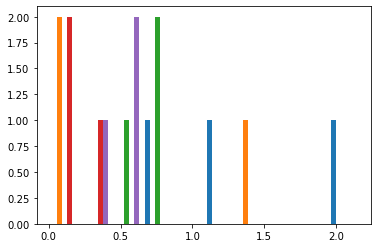

In [16]:
## Comparing  bags-of-words  with  tf-idf  weighting
##--your-code-starts-here--##
import numpy as np
import matplotlib.pyplot as plt

query = ["cat","mammals","mouse","pet","dogaaaafsf"]
terms = ["cat","mammals","mouse","pet","dog"]
percent_docs = [5,2,10,60,20]
idf_given_stats = np.log2(100/np.array(percent_docs))
print(idf_given_stats)

docs = ["cat pet dog pet mouse pet", "cat dog mouse mammals","cat dog cat mouse"]
tfs = []
for doc in docs :
    tf = []
    total  = len(doc.split(" "))
    for term in terms:
        tf.append(doc.count(term)/total)
    tfs.append(tf)
tfs = np.array(tfs)
print(tfs)
#idf = np.array([np.log2(3/3),np.log2(3/1),np.log2(3/3),np.log2(3/1),0])
tf_idfs = np.multiply(tfs, idf_given_stats)
plt.hist(tf_idfs)

tf_query = [0.25, 0.25, 0.25, 0.25,0]
#idf_query = np.array([np.log2(3/3),np.log2(3/1),np.log2(3/3),np.log2(3/1),0])
tf_idf_query = np.multiply(tf_query, idf_given_stats)
print(tf_idf_query)

cos_sim = []
for a in tf_idfs:
    print(a,np.dot(a,tf_idf_query))
    cos_sim.append(np.dot(a, tf_idf_query)/(np.linalg.norm(a)*np.linalg.norm(tf_idf_query)))
print("Similarity Measure", cos_sim)
##--your-code-ends-here--##

## Exercise 2 - Precision  and  recall
There is a database of 10000 images and a user, who is only interested in images which contain a car. It is known that there are 500 such images in the database. An  automatic image retrieval system retrieves 300 car images and 50 other images from the database. Determine and report the precision and recall of the retrieval  system in this particularcase.

Type your answer here:<br>
Precision = 300/350 = 0.857 <br>
Recall = 300/500 = 0.6

## Exercise 3 - VGG practical on object instance recognition
See the questions in part[1-3].ipynb and write your answers here.

Part1:
Stage I.A (two questions)

<b>Question</b>: Note the change in density of detections across the image. Why does it change? Will it be a problem for matching? How could it be avoided?

The difference in the density of detections are because of the change in the illumication across different regions of the image. The intensity of the pixel values varies a lot between the different regions of the image. It can be avoided by normalising the image intensities to reduce the difference.

<b>Question</b>: Occasionally, a feature is detected multiple times, with different orientations. This may happen when the orientation assignment is ambiguous. Which kind of image structure would result in ambiguous orientation assignment?



Stage I.B (two questions)

<b>Question</b>: Note the descriptors are computed over a much larger region (shown in blue) than the detection (shown in green). Why?

<b>Question</b>: Notice that there are many mismatches. Examine some of the mismatches to understand why the mistakes are being made. For example, is the change in lighting a problem? What additional constraints can be applied to remove the mismatches?

Stage I.C (one question)

<b>Question</b>: Examine some of the remaining mismatches to understand why they have occurred. How could they be removed?


Part2 (one question)



Part3:
Stage III.A (three questions)
Stage III.B (one question)
Stage III.C (two questions)

Type your answers here: 